In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict
from scipy.stats.mstats import gmean
import netCDF4 as nc

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display



%matplotlib inline

In [151]:
#data = pd.read_csv('evaldata_shem_2.csv', index_col=0,header=0)
data = pd.read_csv('evaldata_shem_predflag.csv', index_col=0,header=0)

In [152]:
data

,Unnamed: 0,Key,region_name,Lat,Lon,Date,Z_lower,Z_upper,dtUTC,YD,...,SHEM_totalDI,L10SHEM_mesozooplankton,L10SHEM_mesozooplanktonDI,logt_invL10SHEM_mesozooplanktonDI,L10SHEM_microooplankton,L10SHEM_microzooplanktonDI,logt_invL10SHEM_microzooplanktonDI,L10SHEM_total,L10SHEM_totalDI,logt_invL10SHEM_totalDI
1497,79,022618COW3V21412,San Juan,48.67437,-123.0481,2018-02-26 00:00:00,50.0,0,2018-02-26 22:12:00,57,...,32.217026,1.354048,0.053384,1.129794,1.331994,0.053384,1.129794,1.644181,0.343339,2.203645
1498,83,030118CAMV1058,Whidbey Basin,48.05901,-122.3873,2018-03-01 00:00:00,177.0,0,2018-03-01 18:58:00,60,...,139.510205,1.388078,0.636134,4.325469,1.469465,0.636134,4.325469,1.731697,0.979708,9.542498
1499,85,030118SARAV1321,Whidbey Basin,48.25673,-122.5442,2018-03-01 00:00:00,81.0,0,2018-03-01 21:21:00,60,...,82.764129,1.511966,0.420603,2.632922,1.572703,0.420603,2.632922,1.844419,0.752975,5.661066
1500,86,030118SKETV1405,South Sound,47.15243,-122.6586,2018-03-01 00:00:00,114.0,0,2018-03-01 22:05:00,60,...,87.633089,1.394678,0.451719,2.828558,1.443559,0.451719,2.828558,1.720828,0.777797,5.994103
1501,895,IOS2018096000201,Central Strait of Georgia,49.25000,-123.7550,3/3/2018,395.0,0,2018-03-04 00:13:00,63,...,64.047557,0.741398,0.338115,2.177289,0.746606,0.338115,2.177289,1.045001,0.641658,4.380853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,1339,UBC9999099001201,Tidal Mixed,48.63000,-123.2430,8/27/2018,138.0,0,2018-08-27 17:35:00,239,...,212.405772,1.617464,0.757408,5.719158,1.805074,0.757408,5.719158,2.022347,1.162252,14.528555
1702,830,082718ELIV1037,Bellingham Bay,48.63795,-122.5694,2018-08-27 00:00:00,109.0,0,2018-08-27 17:37:00,239,...,255.320750,1.835614,0.873093,7.465079,1.962529,0.873093,7.465079,2.204718,1.242167,17.463939
1703,1341,UBC9999099001401,Juan de Fuca,48.30000,-124.0000,8/27/2018,104.0,0,2018-08-28 01:45:00,240,...,114.385302,1.515485,0.532632,3.408041,1.627998,0.532632,3.408041,1.876399,0.893482,7.823955
1704,845,083018MUKV1006,Whidbey Basin,47.97166,-122.3222,2018-08-30 00:00:00,192.0,0,2018-08-30 17:06:00,242,...,304.596139,1.630480,0.913824,8.199190,1.818287,0.913824,8.199190,2.035483,1.318801,20.834376


In [153]:
data.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Lat', 'Lon', 'Date', 'Z_lower',
       'Z_upper', 'dtUTC', 'YD', 'Total', 'Month', 'Year', 'Total mg m2', 'j',
       'i', 'mod_microzooplankton', 'mod_mesozooplankton', 'k_upper',
       'k_lower', 'mod_total', 'mod_mesozooplanktonDI', 'L10Total',
       'L10TotalDI', 'L10mod_microzooplankton', 'L10mod_mesozooplankton',
       'L10mod_total', 'L10mod_mesozooplanktonDI', 'logt_invL10Total',
       'logt_invL10TotalDI', 'logt_invL10mod_mesozooplanktonDI',
       'SHEM_mesozooplankton', 'SHEM_microzooplankton', 'SHEM_total',
       'SHEM_microzooplanktonDI', 'SHEM_mesozooplanktonDI', 'SHEM_totalDI',
       'L10SHEM_mesozooplankton', 'L10SHEM_mesozooplanktonDI',
       'logt_invL10SHEM_mesozooplanktonDI', 'L10SHEM_microooplankton',
       'L10SHEM_microzooplanktonDI', 'logt_invL10SHEM_microzooplanktonDI',
       'L10SHEM_total', 'L10SHEM_totalDI', 'logt_invL10SHEM_totalDI'],
      dtype='object')

In [226]:
print(data['Total'].min())
print(data['Total'].max())
print(data['Total'].mean())

1.703610063428072
400.352292
42.78013187440128


In [227]:
print(data['mod_mesozooplankton'].min()*5.7*12)
print(data['mod_mesozooplankton'].max()*5.7*12)
print(data['mod_mesozooplankton'].mean()*5.7*12)

5.215107362497475
119.83277157326387
37.899641846822774


In [228]:
print(data['SHEM_mesozooplankton'].min()*5.7*12)
print(data['SHEM_mesozooplankton'].max()*5.7*12)
print(data['SHEM_mesozooplankton'].mean()*5.7*12)

5.512123878790425
113.6299197405366
43.25456994857426


In [229]:
print(data['SHEM_total'].min()*5.7*12)
print(data['SHEM_total'].max()*5.7*12)
print(data['SHEM_total'].mean()*5.7*12)

11.090766887601864
201.15649902782746
102.53864346628936


In [230]:
print(data['mod_total'].min()*5.7*12)
print(data['mod_total'].max()*5.7*12)
print(data['mod_total'].mean()*5.7*12)

7.7915412769404595
165.31480288993302
60.44944029571324


In [160]:
cm1=cmocean.cm.thermal
with nc.Dataset('//home/jvalenti/MOAD/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

In [161]:
data['broadregions']=np.nan

In [162]:
data.region_name

1497                     San Juan
1498                Whidbey Basin
1499                Whidbey Basin
1500                  South Sound
1501    Central Strait of Georgia
                  ...            
1701                  Tidal Mixed
1702               Bellingham Bay
1703                 Juan de Fuca
1704                Whidbey Basin
1705                Whidbey Basin
Name: region_name, Length: 209, dtype: object

In [163]:
#data.loc[(data.region_name=='Northern Strait of Georgia')|(data.region_name=='Central Strait of Georgia')|(data.region_name=='Southern Strait of Georgia'),['broadregions']]='SoG'
data.loc[(data.region_name=='Northern Strait of Georgia')|(data.region_name=='Central Strait of Georgia'),['broadregions']]='Main SoG'
data.loc[(data.region_name=='Southern Strait of Georgia'),['broadregions']]='Southern SoG'
data.loc[(data.region_name=='Nearshore-Central East')|(data.region_name=='Nearshore-North East')|(data.region_name=='Nearshore North West'),['broadregions']]='Nearshore'
data.loc[(data.region_name=='Baynes Sound'),['broadregions']]='Baynes'
data.loc[(data.region_name=='Tidal Mixed')|(data.region_name=='Gulf Islands')|(data.region_name=='San Juan Islands')|(data.region_name=='San Juan'),['broadregions']]='Mixed'
data.loc[(data.region_name=='Juan de Fuca'),['broadregions']]='JdeF'

data.loc[(data.region_name=='Whidbey Basin')|(data.region_name=='Bellingham Bay')|(data.region_name=='Admiralty Inlet'),['broadregions']]='North Sound'
data.loc[(data.region_name=='Central Basin'),['broadregions']]='Central Sound'
data.loc[(data.region_name=='South Sound')|(data.region_name=='Hood Canal'),['broadregions']]='South Sound'
#data.loc[(data.region_name=='Hood Canal'),['broadregions']]='Hood Canal'

/tmp/ipykernel_861523/1293757410.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Main SoG' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data.region_name=='Northern Strait of Georgia')|(data.region_name=='Central Strait of Georgia'),['broadregions']]='Main SoG'


In [164]:
#data.loc[data['broadregions']=='SoG']

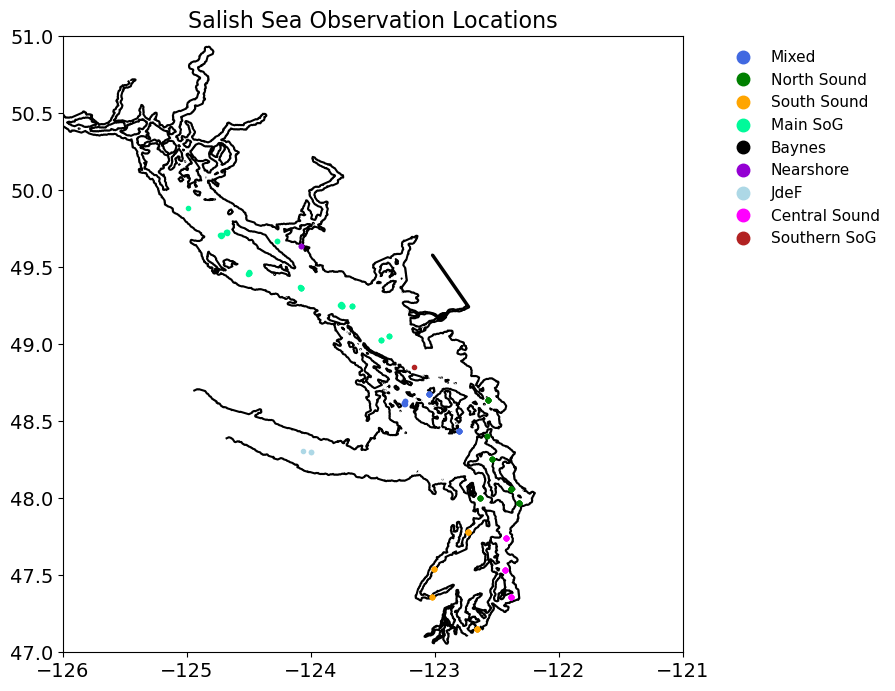

In [165]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
with nc.Dataset('/home/jvalenti/MOAD/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1)
colors=('royalblue',
'green',
'orange',
'mediumspringgreen',
'black',
'darkviolet',
 'lightblue',
'fuchsia',
'firebrick','lime','darkgoldenrod','darkorange','deepskyblue','teal','darkgreen','darkblue','slateblue','purple')
datreg=dict()
for ind, iregion in enumerate(data.broadregions.unique()):
    datreg[iregion] = data.loc[data.broadregions==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion)
ax.set_ylim(47, 51)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -121);
ax.set_title('Salish Sea Observation Locations');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,markerscale=3.,fontsize=11)
#fig.savefig('SalishSeaObservationLocations.jpg',bbox_inches='tight')

In [166]:
def byRegion(ax,obsvar,modvar,lims):
    SS=[]
    for ind, iregion in enumerate(data.broadregions.unique()):
        #ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
                #color = colors[ind], label=iregion)
        SS0=et.varvarPlot(ax,datreg[iregion],obsvar,modvar,
                          cols=(colors[ind],),lname=iregion)
        SS.append(SS0)
    l=ax.legend(handles=[ip[0][0] for ip in SS])
    ax.set_xlabel('Log10 Observations (g C m$^{-2}$) +0.001 ')
    ax.set_ylabel('Log10 Model (g C m$^{-2}$) +0.001')
    ax.plot(lims,lims,'k-',alpha=.5)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect(1)
    return SS,l

In [167]:
#data['Month']=[ii.month for ii in data['dtUTC']]
DJF=data.loc[(data.Month==12)|(data.Month==1)|(data.Month==2)]
MAM=data.loc[(data.Month==3)|(data.Month==4)|(data.Month==5)]
JJA=data.loc[(data.Month==6)|(data.Month==7)|(data.Month==8)]
SON=data.loc[(data.Month==9)|(data.Month==10)|(data.Month==11)]

In [168]:
def bySeason(ax,obsvar,modvar,lims):
    for axi in ax:
        axi.plot(lims,lims,'k-')
        axi.set_xlim(lims)
        axi.set_ylim(lims)
        axi.set_aspect(1)
        axi.set_xlabel('Obs')
        axi.set_ylabel('Model')
    SS=et.varvarPlot(ax[0],DJF,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[0].set_title('Winter')
    SS=et.varvarPlot(ax[1],MAM,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[1].set_title('Spring')
    SS=et.varvarPlot(ax[2],JJA,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[2].set_title('Summer')
    SS=et.varvarPlot(ax[3],SON,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[3].set_title('Autumn')
    return 

In [169]:
data.region_name.unique()

array(['San Juan', 'Whidbey Basin', 'South Sound',
       'Central Strait of Georgia', 'Northern Strait of Georgia',
       'Baynes Sound', 'Nearshore-North East', 'Juan de Fuca',
       'Central Basin', 'Southern Strait of Georgia', 'Hood Canal',
       'Admiralty Inlet', 'Bellingham Bay', 'Tidal Mixed'], dtype=object)

In [170]:
data['Month']

1497    2
1498    3
1499    3
1500    3
1501    3
       ..
1701    8
1702    8
1703    8
1704    8
1705    8
Name: Month, Length: 209, dtype: int64

In [171]:
#data.loc[(data.region_name=='Northern Strait of Georgia')|(data.region_name=='Central Strait of Georgia')|(data.region_name=='Southern Strait of Georgia'),['broadregions']]='SoG'
MainSoG=data.loc[(data.region_name=='Northern Strait of Georgia')|(data.region_name=='Central Strait of Georgia')]
SouthernSoG=data.loc[(data.region_name=='Southern Strait of Georgia')]
Nearshore=data.loc[(data.region_name=='Nearshore-Central East')|(data.region_name=='Nearshore-North East')|(data.region_name=='Nearshore North West')]
Baynes=data.loc[(data.region_name=='Baynes Sound')]
Mixed=data.loc[(data.region_name=='Tidal Mixed')|(data.region_name=='Gulf Islands')|(data.region_name=='San Juan Islands')|(data.region_name=='San Juan')]
JdeF=data.loc[(data.region_name=='Juan de Fuca')]

NorthSound=data.loc[(data.region_name=='Whidbey Basin')|(data.region_name=='Bellingham Bay')|(data.region_name=='Admiralty Inlet')]
CentralSound=data.loc[(data.region_name=='Central Basin')]
SouthSound=data.loc[(data.region_name=='South Sound')|(data.region_name=='Hood Canal')]
#data.loc[(data.region_name=='Hood Canal'),['broadregions']]='Hood Canal'

In [172]:
MainSoG.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Lat', 'Lon', 'Date', 'Z_lower',
       'Z_upper', 'dtUTC', 'YD', 'Total', 'Month', 'Year', 'Total mg m2', 'j',
       'i', 'mod_microzooplankton', 'mod_mesozooplankton', 'k_upper',
       'k_lower', 'mod_total', 'mod_mesozooplanktonDI', 'L10Total',
       'L10TotalDI', 'L10mod_microzooplankton', 'L10mod_mesozooplankton',
       'L10mod_total', 'L10mod_mesozooplanktonDI', 'logt_invL10Total',
       'logt_invL10TotalDI', 'logt_invL10mod_mesozooplanktonDI',
       'SHEM_mesozooplankton', 'SHEM_microzooplankton', 'SHEM_total',
       'SHEM_microzooplanktonDI', 'SHEM_mesozooplanktonDI', 'SHEM_totalDI',
       'L10SHEM_mesozooplankton', 'L10SHEM_mesozooplanktonDI',
       'logt_invL10SHEM_mesozooplanktonDI', 'L10SHEM_microooplankton',
       'L10SHEM_microzooplanktonDI', 'logt_invL10SHEM_microzooplanktonDI',
       'L10SHEM_total', 'L10SHEM_totalDI', 'logt_invL10SHEM_totalDI',
       'broadregions'],
      dtype='object')

In [173]:
monthlymeanMainSoG=MainSoG.groupby(['Month'])[MainSoG.select_dtypes(include="number").columns].mean()
monthlymeanSouthernSoG=SouthernSoG.groupby(['Month'])[SouthernSoG.select_dtypes(include="number").columns].mean()
monthlymeanNearshore=Nearshore.groupby(['Month'])[Nearshore.select_dtypes(include="number").columns].mean()
monthlymeanBaynes=Baynes.groupby(['Month'])[Baynes.select_dtypes(include="number").columns].mean()
monthlymeanMixed=Mixed.groupby(['Month'])[Mixed.select_dtypes(include="number").columns].mean()
monthlymeanJdeF=JdeF.groupby(['Month'])[JdeF.select_dtypes(include="number").columns].mean()
monthlymeanSouthSound=SouthSound.groupby(['Month'])[SouthSound.select_dtypes(include="number").columns].mean()
monthlymeanNorthSound=NorthSound.groupby(['Month'])[NorthSound.select_dtypes(include="number").columns].mean()
monthlymeanCentralSound=CentralSound.groupby(['Month'])[CentralSound.select_dtypes(include="number").columns].mean()

monthlymean=data.groupby(['Month'])[data.select_dtypes(include="number").columns].mean()

In [174]:
monthlysemMainSoG=MainSoG.groupby(['Month'])[MainSoG.select_dtypes(include="number").columns].sem()
monthlysemSouthernSoG=SouthernSoG.groupby(['Month'])[SouthernSoG.select_dtypes(include="number").columns].sem()
monthlysemNearshore=Nearshore.groupby(['Month'])[Nearshore.select_dtypes(include="number").columns].sem()
monthlysemBaynes=Baynes.groupby(['Month'])[Baynes.select_dtypes(include="number").columns].sem()
monthlysemMixed=Mixed.groupby(['Month'])[Mixed.select_dtypes(include="number").columns].sem()
monthlysemJdeF=JdeF.groupby(['Month'])[JdeF.select_dtypes(include="number").columns].sem()
monthlysemSouthSound=SouthSound.groupby(['Month'])[SouthSound.select_dtypes(include="number").columns].sem()
monthlysemNorthSound=NorthSound.groupby(['Month'])[NorthSound.select_dtypes(include="number").columns].sem()
monthlysemCentralSound=CentralSound.groupby(['Month'])[CentralSound.select_dtypes(include="number").columns].sem()

monthlysem=data.groupby(['Month'])[data.select_dtypes(include="number").columns].sem()

In [175]:
print(monthlymean['Total'].mean())
print(monthlymean['mod_total'].mean()*5.7*12)

37.59552669014166
57.838266522439014


In [176]:
print(monthlymean['Total'].min())
print(monthlymean['mod_mesozooplankton'].min()*5.7*12)
print(monthlymean['SHEM_mesozooplankton'].min()*5.7*12)

1.703610063428072
16.897097461289047
18.422171576119524


In [177]:
print(monthlymean['Total'].max())
print(monthlymean['mod_mesozooplankton'].max()*5.7*12)
print(monthlymean['SHEM_mesozooplankton'].max()*5.7*12)

55.87806999425496
48.642783627623544
56.808686331498


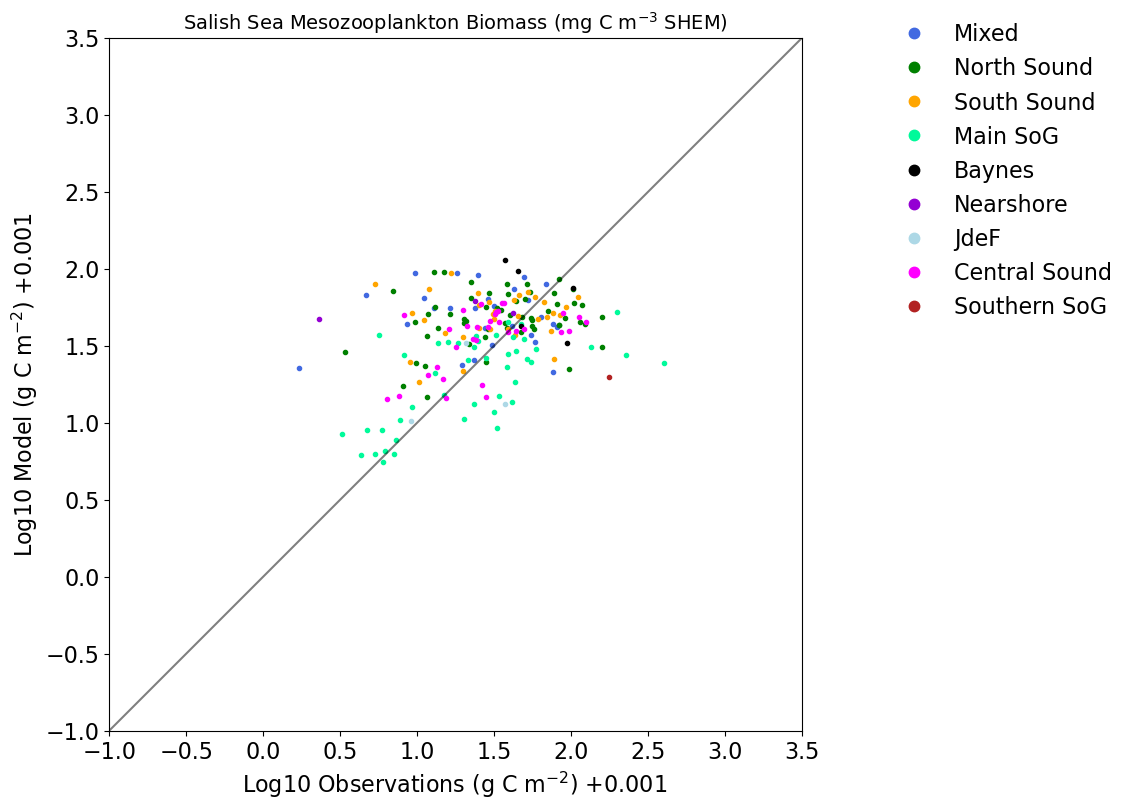

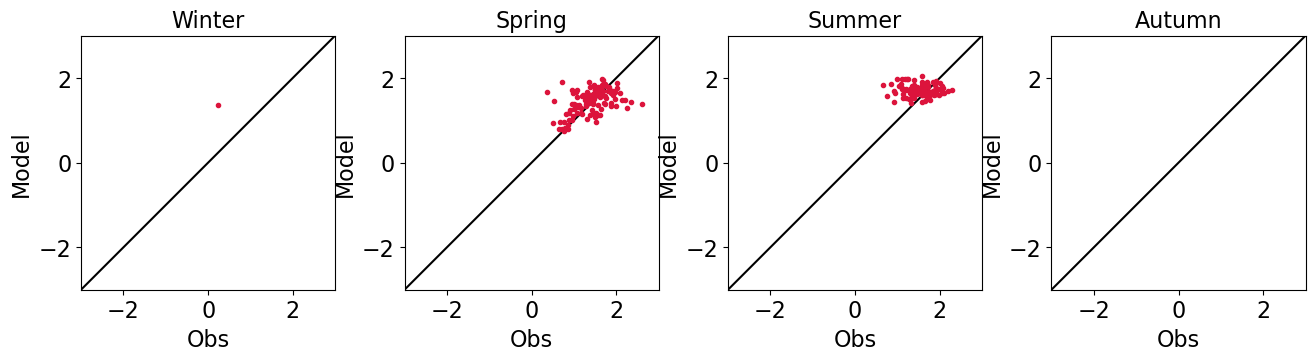

In [178]:
fig, ax = plt.subplots(1,1,figsize = (16,9))     
PS,l=byRegion(ax,'L10Total','L10SHEM_mesozooplankton',(-1,3.5))
ax.set_title('Salish Sea Mesozooplankton Biomass (mg C m$^{-3}$ SHEM)',fontsize=14)
ax.legend(bbox_to_anchor=(1.1, 1.05),frameon=False,markerscale=2.5)
#fig.savefig('SalishSeaMesoZoopEval_byregion.jpg',bbox_inches='tight')
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Total','L10SHEM_mesozooplankton',(-3,3))

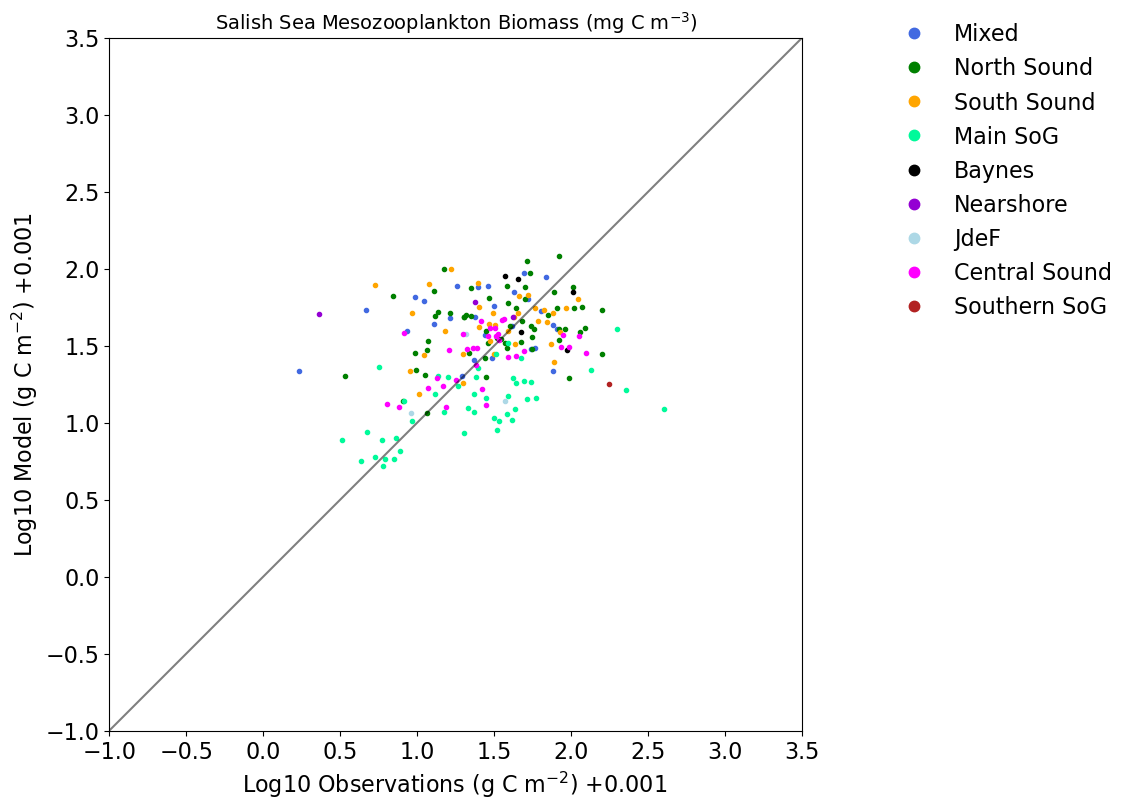

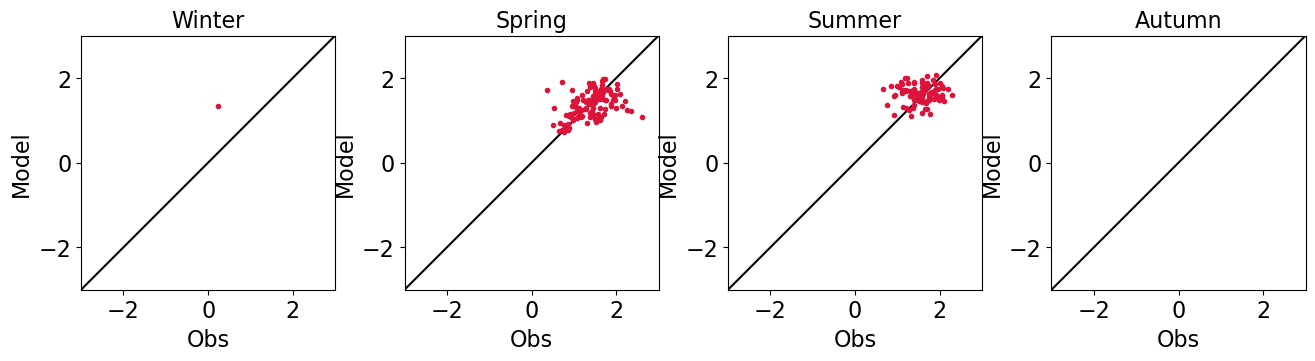

In [179]:
fig, ax = plt.subplots(1,1,figsize = (16,9))     
PS,l=byRegion(ax,'L10Total','L10mod_mesozooplankton',(-1,3.5))
ax.set_title('Salish Sea Mesozooplankton Biomass (mg C m$^{-3}$)',fontsize=14)
ax.legend(bbox_to_anchor=(1.1, 1.05),frameon=False,markerscale=2.5)
#fig.savefig('SalishSeaMesoZoopEval_byregion.jpg',bbox_inches='tight')
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Total','L10mod_mesozooplankton',(-3,3))

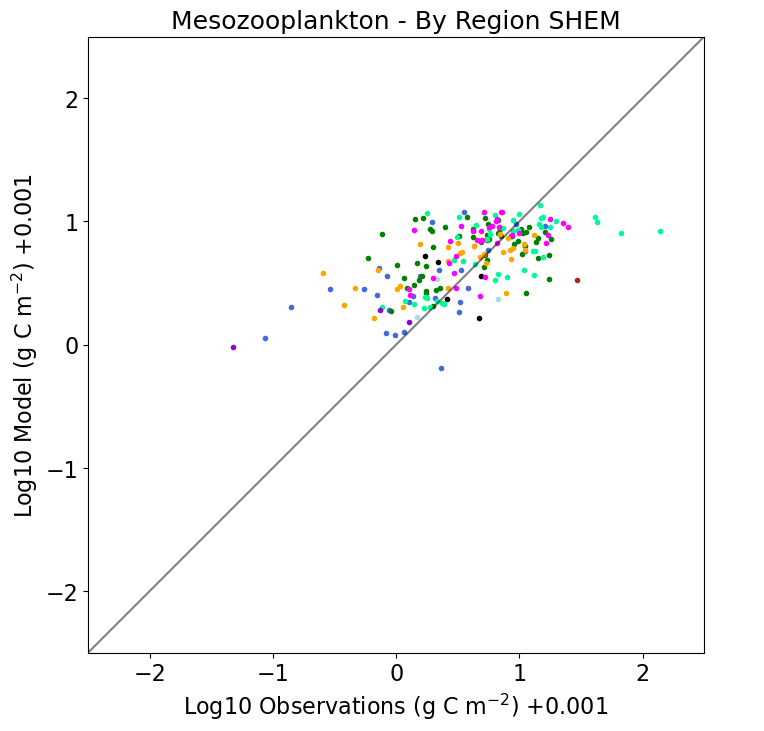

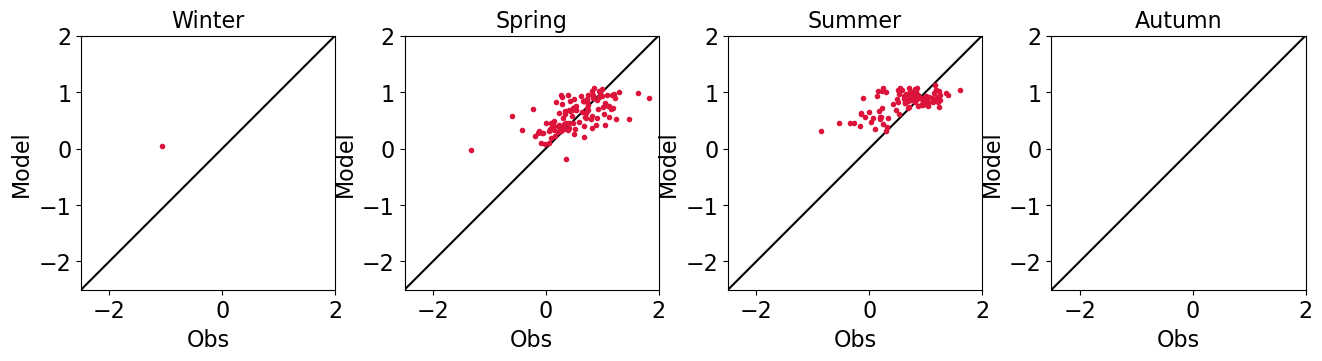

In [180]:
fig, ax = plt.subplots(1,1,figsize = (9,8))     
PS,l=byRegion(ax,'L10TotalDI','L10SHEM_mesozooplanktonDI',(-2.5,2.5))
ax.set_title('Mesozooplankton - By Region SHEM',fontsize=18)
ax.legend((),bbox_to_anchor=(1.1, 1.05),frameon=False,markerscale=2.5)
#fig.savefig('SalishSeaDIMesoZoopEval_byregion_noLegend.jpg',bbox_inches='tight')
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10TotalDI','L10SHEM_mesozooplanktonDI',(-2.5,2))

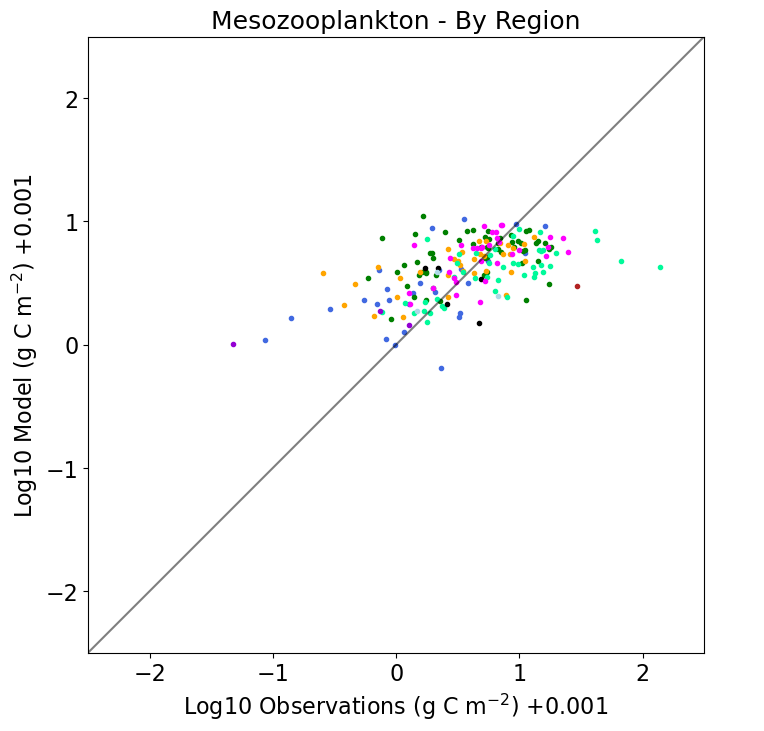

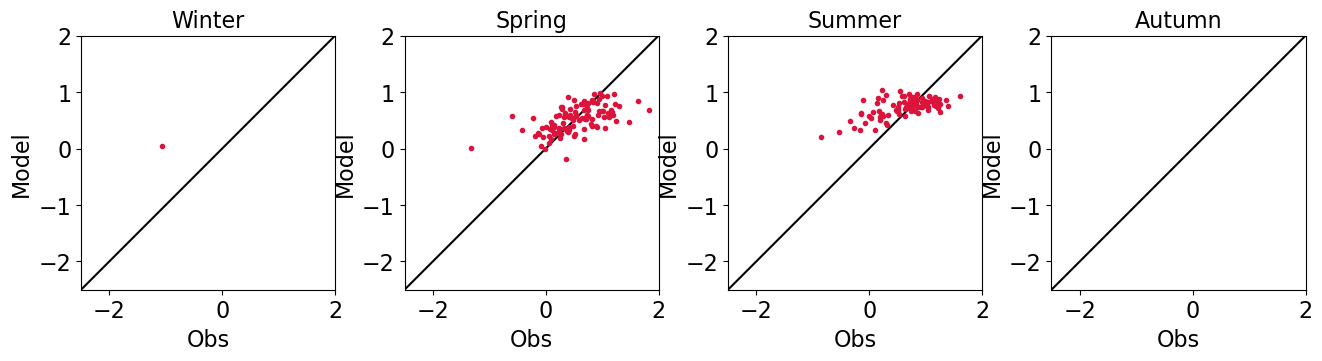

In [181]:
fig, ax = plt.subplots(1,1,figsize = (9,8))     
PS,l=byRegion(ax,'L10TotalDI','L10mod_mesozooplanktonDI',(-2.5,2.5))
ax.set_title('Mesozooplankton - By Region',fontsize=18)
ax.legend((),bbox_to_anchor=(1.1, 1.05),frameon=False,markerscale=2.5)
#fig.savefig('SalishSeaDIMesoZoopEval_byregion_noLegend.jpg',bbox_inches='tight')
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10TotalDI','L10mod_mesozooplanktonDI',(-2.5,2))

In [182]:
x_values=data['L10TotalDI']
y_values=data['L10SHEM_mesozooplanktonDI']

iii=(~pd.isnull(data.L10TotalDI))&(~pd.isnull(data.L10SHEM_mesozooplanktonDI))
x2_values=data.loc[iii,['L10TotalDI']].values[:,0]
y2_values=data.loc[iii,['L10SHEM_mesozooplanktonDI']].values[:,0]

correlation_matrix = np.corrcoef(x2_values, y2_values)
correlation_xy = correlation_matrix[0,1]
r2shem = correlation_xy**2

x_values=data['L10TotalDI']
y_values=data['L10mod_mesozooplanktonDI']

iii=(~pd.isnull(data.L10TotalDI))&(~pd.isnull(data.L10mod_mesozooplanktonDI))
x2_values=data.loc[iii,['L10TotalDI']].values[:,0]
y2_values=data.loc[iii,['L10mod_mesozooplanktonDI']].values[:,0]

correlation_matrix = np.corrcoef(x2_values, y2_values)
correlation_xy = correlation_matrix[0,1]
r2 = correlation_xy**2

Text(1.5, -2.25, 'R$^{2}$ =0.37')

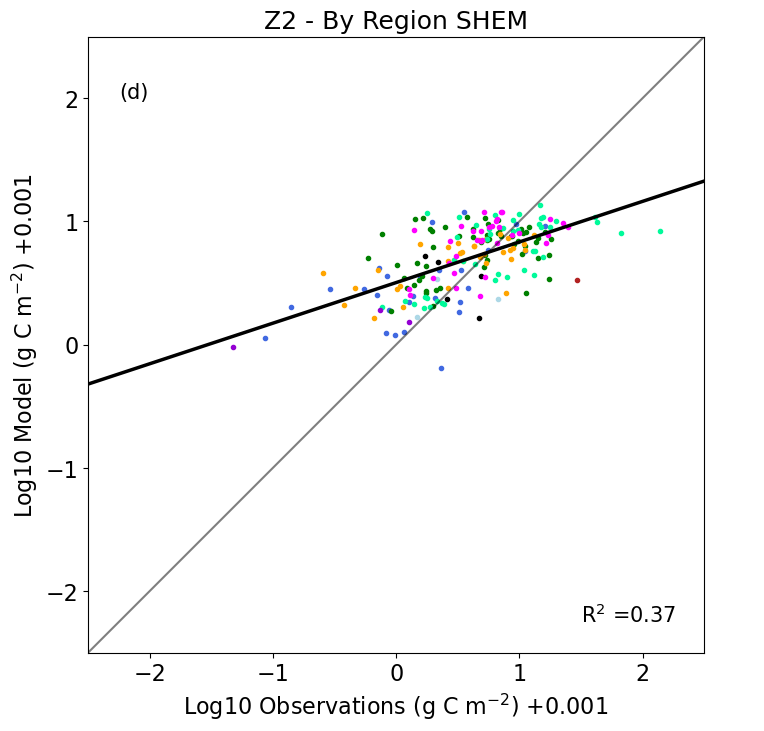

In [183]:
x=['L10TotalDI']
y=['L10SHEM_mesozooplanktonDI']
#datatemp=datreg['South Sound']

iii=(~pd.isnull(data.L10TotalDI))&(~pd.isnull(data.L10SHEM_mesozooplanktonDI))
x2shem=data.loc[iii,['L10TotalDI']].values[:,0]
y2shem=data.loc[iii,['L10SHEM_mesozooplanktonDI']].values[:,0]

fig, ax = plt.subplots(1,1,figsize = (9,8))     
PS,l=byRegion(ax,'L10TotalDI','L10SHEM_mesozooplanktonDI',(-2.5,2.5))
ax.set_title('Z2 - By Region SHEM',fontsize=18)
ax.legend((),bbox_to_anchor=(1.1, 1.05),frameon=False,markerscale=2.5)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
a,b = np.polyfit(x2shem, y2shem, 1)

xseq=np.linspace(-2.5,2.5,10)

# Plot regression line
ax.plot(xseq, a * xseq + b , color="k", lw=2.5);
ax.text(-2.25, 2, '(d)', fontsize=15,  color='k')
ax.text(1.5, -2.25, 'R$^{2}$ ='+ str(round(r2shem,2)), fontsize=15,  color='k')

#plt.savefig('SalishSeaDIMesoZoopEval_byregion_noLegend.png', bbox_inches='tight',dpi=1000,transparent=False)


Text(1.5, -2.25, 'R$^{2}$ =0.32')

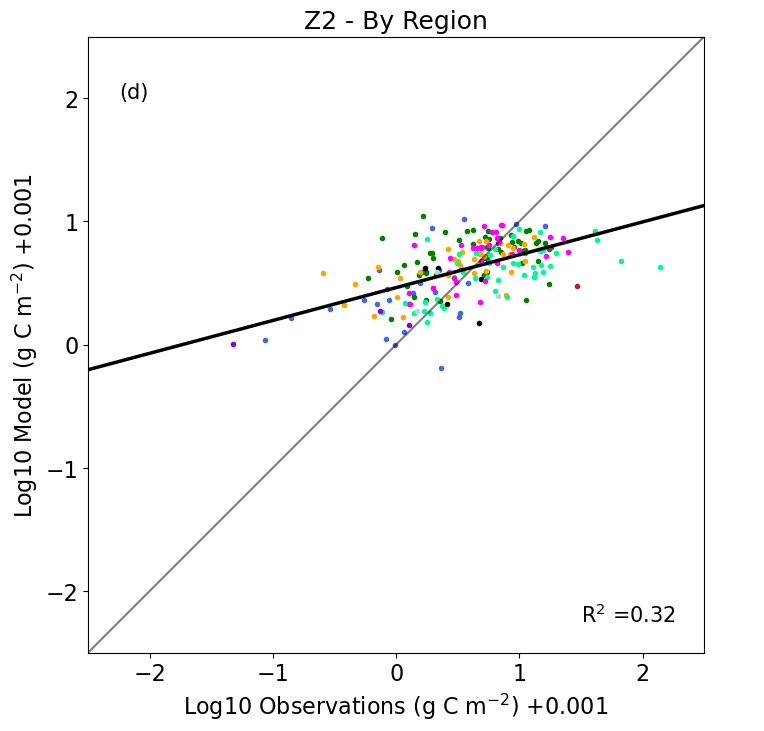

In [184]:
x=['L10TotalDI']
y=['L10mod_mesozooplanktonDI']
#datatemp=datreg['South Sound']

iii=(~pd.isnull(data.L10TotalDI))&(~pd.isnull(data.L10mod_mesozooplanktonDI))
x2=data.loc[iii,['L10TotalDI']].values[:,0]
y2=data.loc[iii,['L10mod_mesozooplanktonDI']].values[:,0]

fig, ax = plt.subplots(1,1,figsize = (9,8))     
PS,l=byRegion(ax,'L10TotalDI','L10mod_mesozooplanktonDI',(-2.5,2.5))
ax.set_title('Z2 - By Region',fontsize=18)
ax.legend((),bbox_to_anchor=(1.1, 1.05),frameon=False,markerscale=2.5)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
a,b = np.polyfit(x2, y2, 1)

xseq=np.linspace(-2.5,2.5,10)

# Plot regression line
ax.plot(xseq, a * xseq + b , color="k", lw=2.5);
ax.text(-2.25, 2, '(d)', fontsize=15,  color='k')
ax.text(1.5, -2.25, 'R$^{2}$ ='+ str(round(r2,2)), fontsize=15,  color='k')

#plt.savefig('SalishSeaDIMesoZoopEval_byregion_noLegend.png', bbox_inches='tight',dpi=1000,transparent=False)


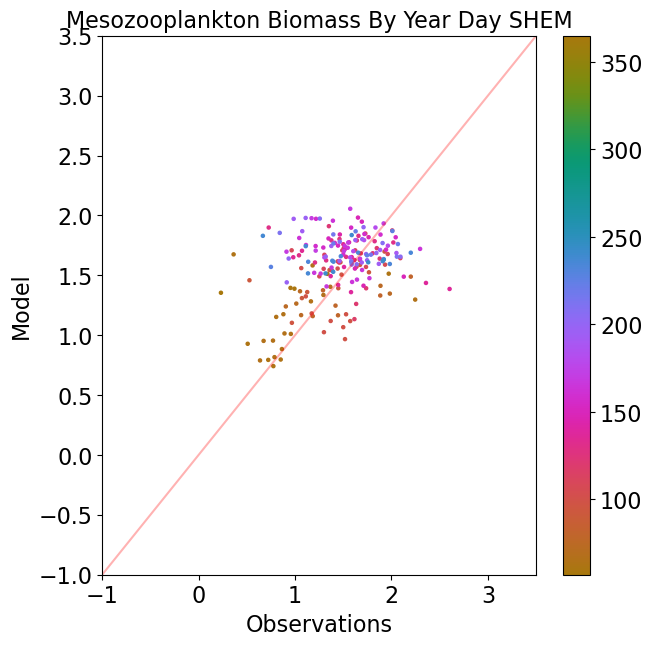

In [185]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
m=ax.scatter((data['L10Total']),(data['L10SHEM_mesozooplankton']),
          c=data['YD'],s=5,cmap=cmocean.cm.phase,vmax=365)

ax.set_title('Mesozooplankton Biomass By Year Day SHEM')
ax.set_xlabel('Observations')
ax.set_ylabel('Model')
ax.plot((-6,5),(-6,5),'r-',alpha=.3)
ax.set_xlim(-1,3.5)
ax.set_ylim(-1,3.5)
fig.colorbar(m)
#fig.savefig('SalishSeaMesozoopModelvsObsbyDOY.png',bbox_inches='tight')

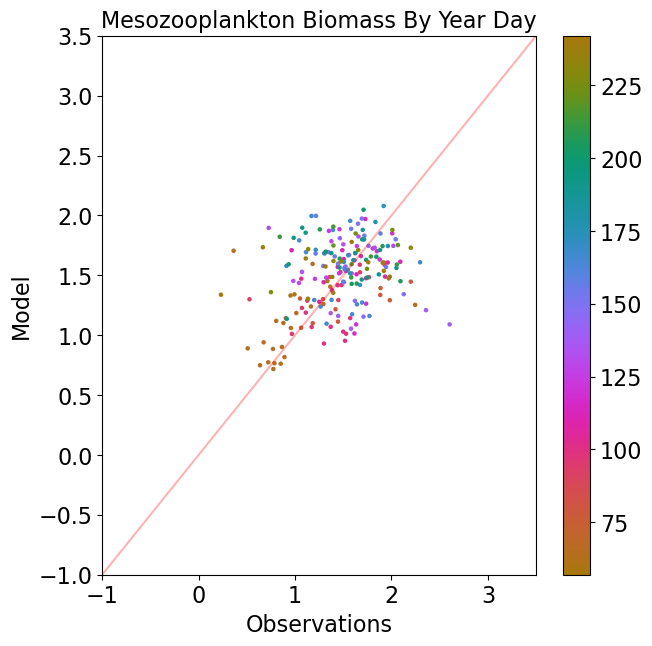

In [186]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
m=ax.scatter((data['L10Total']),(data['L10mod_mesozooplankton']),
          c=data['YD'],s=5,cmap=cmocean.cm.phase)

ax.set_title('Mesozooplankton Biomass By Year Day')
ax.set_xlabel('Observations')
ax.set_ylabel('Model')
ax.plot((-6,5),(-6,5),'r-',alpha=.3)
ax.set_xlim(-1,3.5)
ax.set_ylim(-1,3.5);
fig.colorbar(m)
#fig.savefig('SalishSeaMesozoopModelvsObsbyDOY.png',bbox_inches='tight')

Text(1.5, -2.25, 'R$^{2}$ =0.37')

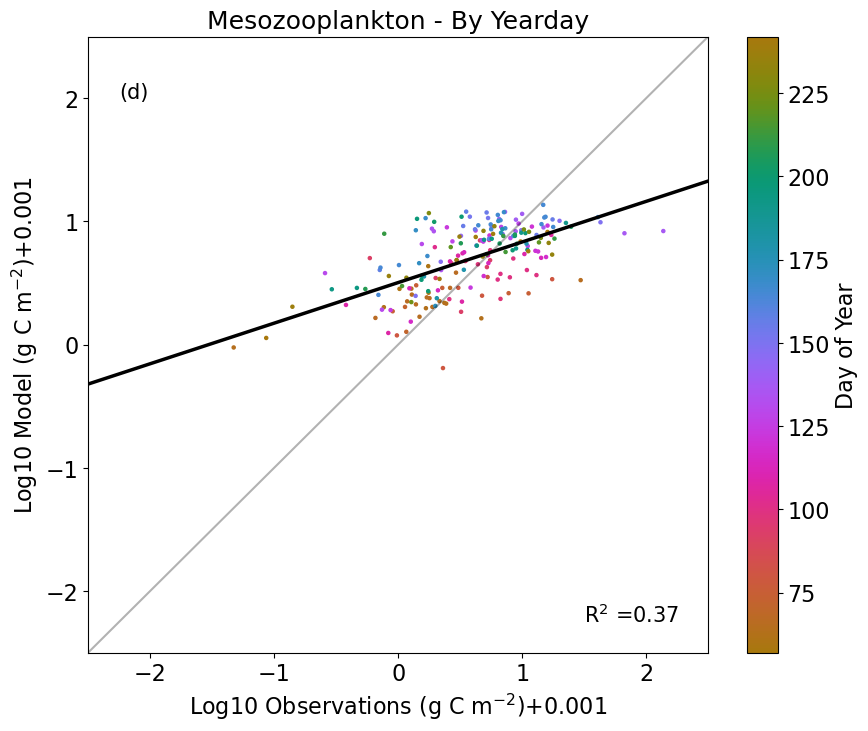

In [187]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
m=ax.scatter((data['L10TotalDI']),(data['L10SHEM_mesozooplanktonDI']),
          c=data['YD'],s=5,cmap=cmocean.cm.phase)

ax.set_title('Mesozooplankton - By Yearday',fontsize=18)
ax.set_xlabel('Log10 Observations (g C m$^{-2}$)+0.001')
ax.set_ylabel('Log10 Model (g C m$^{-2}$)+0.001')
ax.plot((-6,5),(-6,5),'k-',alpha=.3)
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5);
fig.colorbar(m,label='Day of Year')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
a,b = np.polyfit(x2shem, y2shem, 1)

#xseq=np.linspace(-2.5,2.5,10)

# Plot regression line
ax.plot(xseq, a * xseq + b , color="k", lw=2.5);

ax.text(-2.25, 2, '(d)', fontsize=15,  color='k')
ax.text(1.5, -2.25, 'R$^{2}$ ='+ str(round(r2shem,2)), fontsize=15,  color='k')

#plt.savefig('SalishSeaDIMesozoopModelvsObsbyDOY.png', bbox_inches='tight',dpi=1000,transparent=False)


Text(1.5, -2.25, 'R$^{2}$ =0.32')

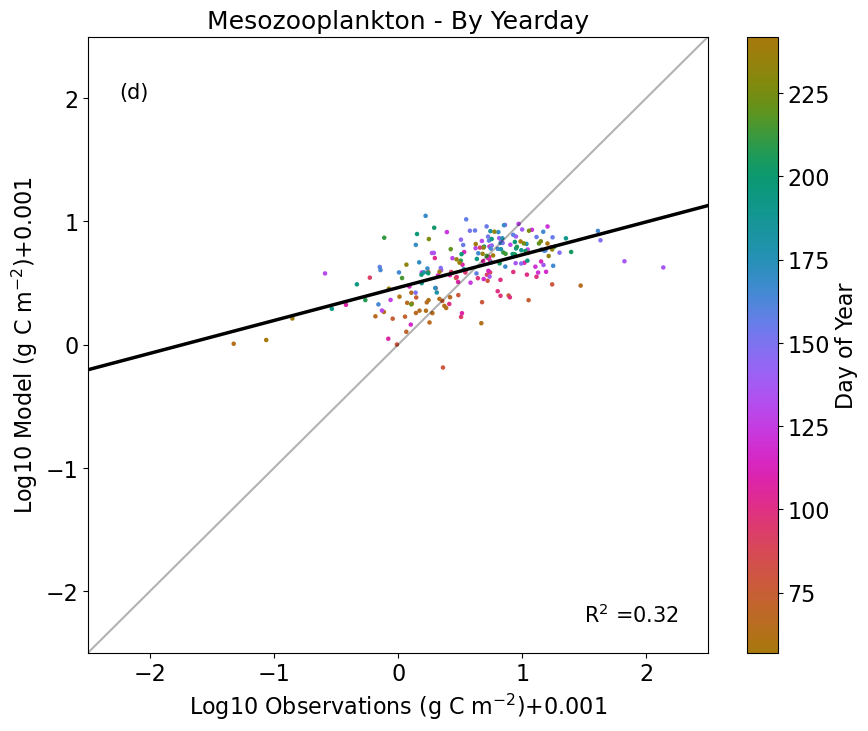

In [188]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
m=ax.scatter((data['L10TotalDI']),(data['L10mod_mesozooplanktonDI']),
          c=data['YD'],s=5,cmap=cmocean.cm.phase)

ax.set_title('Mesozooplankton - By Yearday',fontsize=18)
ax.set_xlabel('Log10 Observations (g C m$^{-2}$)+0.001')
ax.set_ylabel('Log10 Model (g C m$^{-2}$)+0.001')
ax.plot((-6,5),(-6,5),'k-',alpha=.3)
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5);
fig.colorbar(m,label='Day of Year')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
a,b = np.polyfit(x2, y2, 1)

#xseq=np.linspace(-2.5,2.5,10)

# Plot regression line
ax.plot(xseq, a * xseq + b , color="k", lw=2.5);

ax.text(-2.25, 2, '(d)', fontsize=15,  color='k')
ax.text(1.5, -2.25, 'R$^{2}$ ='+ str(round(r2,2)), fontsize=15,  color='k')

#plt.savefig('SalishSeaDIMesozoopModelvsObsbyDOY.png', bbox_inches='tight',dpi=1000,transparent=False)


In [189]:
from matplotlib.colors import LogNorm

Text(-2.25, 2, '(d)')

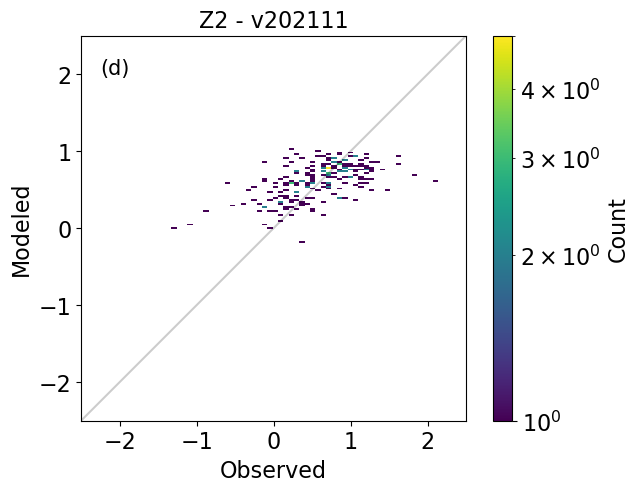

In [190]:
data=data
fig,ax=plt.subplots(1,1,figsize=(7,5))
ii=(~np.isnan(data['L10TotalDI']))&(~np.isnan(data['L10mod_mesozooplanktonDI']))
counts, xedges, yedges, m1=ax.hist2d((data.loc[ii,['L10TotalDI']].values.flatten()+.001),
                                      (data.loc[ii,['L10mod_mesozooplanktonDI']].values.flatten()+.001),bins=25*2,norm=LogNorm())

ax.plot((-2.5,2.5),(-2.5,2.5),'k-',alpha=.2)
cb=fig.colorbar(m1)#,cax=axcb
cb.set_label('Count')
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
ax.set_aspect(1)
ax.set_ylabel('Modeled',fontsize=16)
ax.set_xlabel('Observed',fontsize=16)
ax.set_title('Z2 - v202111',fontsize=16)
ax.text(-2.25, 2, '(d)', fontsize=15,  color='k')



Text(-2.25, 2, '(d)')

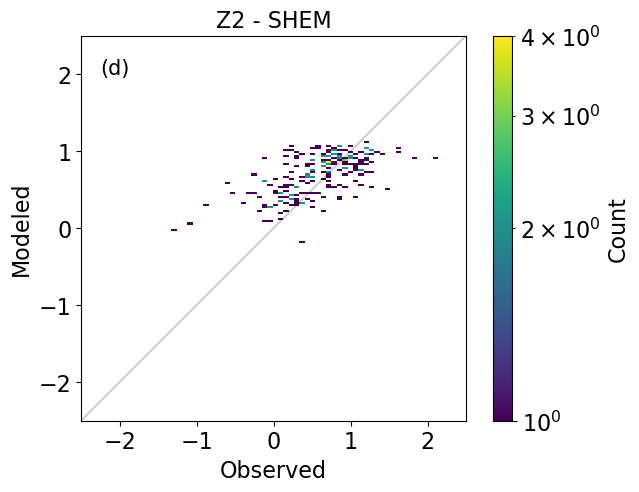

In [191]:
data=data
fig,ax=plt.subplots(1,1,figsize=(7,5))
ii=(~np.isnan(data['L10TotalDI']))&(~np.isnan(data['L10SHEM_mesozooplanktonDI']))
counts, xedges, yedges, m1=ax.hist2d((data.loc[ii,['L10TotalDI']].values.flatten()+.001),
                                      (data.loc[ii,['L10SHEM_mesozooplanktonDI']].values.flatten()+.001),bins=25*2,norm=LogNorm())

ax.plot((-2.5,2.5),(-2.5,2.5),'k-',alpha=.2)
cb=fig.colorbar(m1)#,cax=axcb
cb.set_label('Count')
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
ax.set_aspect(1)
ax.set_ylabel('Modeled',fontsize=16)
ax.set_xlabel('Observed',fontsize=16)
ax.set_title('Z2 - SHEM',fontsize=16)
ax.text(-2.25, 2, '(d)', fontsize=15,  color='k')



In [192]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)
# define inverse log transform with same shift
def logt_inv(y):
    return 10**y-.001

/tmp/ipykernel_861523/2861418980.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.errorbar(monthlymean.index,(logt_inv(monthlymean['L10Total'])),
/tmp/ipykernel_861523/2861418980.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-o" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(monthlymean.index,(logt_inv(monthlymean['L10mod_mesozooplankton'])),
/tmp/ipykernel_861523/2861418980.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-o" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(monthlymean.index,(logt_inv(monthlymean['L10SHEM_mesozooplankton'])),


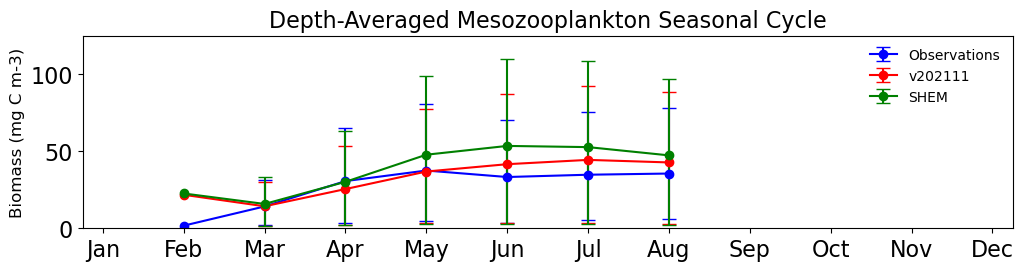

In [193]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) #where you replace axs[0] with whatever your axis is named


#ax.plot(logt_inv(monthlymean['L10Total']),'--',color='k',label='Observations')
#ax.plot(logt_inv(monthlymean['L10mod_mesozooplankton']),'--',color='blue',label='Model')
ax.errorbar(monthlymean.index,(logt_inv(monthlymean['L10Total'])),
               yerr=(np.array([logt_inv(monthlymean['L10Total']-monthlysem['L10Total']),
                 logt_inv(monthlymean['L10Total']+monthlysem['L10Total'])])),
              fmt='r-o',capsize=5,color='blue',label='Observations')

ax.errorbar(monthlymean.index,(logt_inv(monthlymean['L10mod_mesozooplankton'])),
               yerr=(np.array([logt_inv(monthlymean['L10mod_mesozooplankton']-monthlysem['L10mod_mesozooplankton']),
                 logt_inv(monthlymean['L10mod_mesozooplankton']+monthlysem['L10mod_mesozooplankton'])])),
              fmt='k-o',capsize=5,color='red',label='v202111')

ax.errorbar(monthlymean.index,(logt_inv(monthlymean['L10SHEM_mesozooplankton'])),
               yerr=(np.array([logt_inv(monthlymean['L10SHEM_mesozooplankton']-monthlysem['L10SHEM_mesozooplankton']),
                 logt_inv(monthlymean['L10SHEM_mesozooplankton']+monthlysem['L10SHEM_mesozooplankton'])])),
              fmt='k-o',capsize=5,color='green',label='SHEM')

ax.set_ylim(0,125)
ax.set_xlim(0.75,12.25)
ax.set_title('Depth-Averaged Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=12)
ax.legend(fontsize=10,frameon=False,bbox_to_anchor=(1., 1.0))
fig.savefig('SoGMesozoopSeasonalCycle.png',bbox_inches='tight')

/tmp/ipykernel_861523/1907439473.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.errorbar(monthlymean.index,(logt_inv(monthlymean['L10TotalDI'])),
/tmp/ipykernel_861523/1907439473.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-o" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(monthlymean.index,(logt_inv(monthlymean['L10mod_mesozooplanktonDI'])),
/tmp/ipykernel_861523/1907439473.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-o" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(monthlymean.index,(logt_inv(monthlymean['L10SHEM_mesozooplanktonDI'])),


Text(1, 12, '(b)')

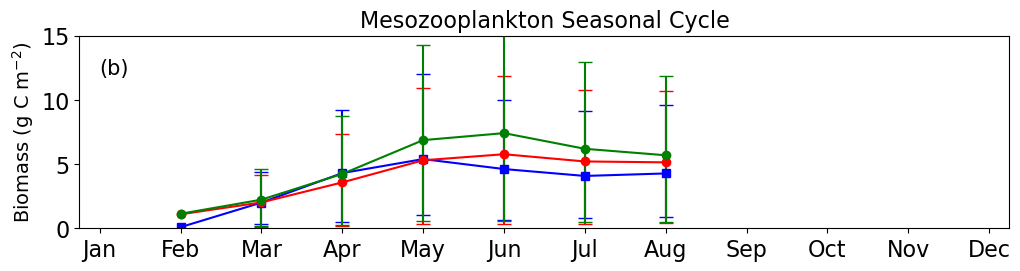

In [194]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) #where you replace axs[0] with whatever your axis is named


#ax.plot(logt_inv(monthlymean['L10Total']),'--',color='k',label='Observations')
#ax.plot(logt_inv(monthlymean['L10mod_mesozooplanktonDI']),'--',color='blue',label='Model')
ax.errorbar(monthlymean.index,(logt_inv(monthlymean['L10TotalDI'])),
               yerr=(np.array([logt_inv(monthlymean['L10TotalDI']-monthlysem['L10TotalDI']),
                 logt_inv(monthlymean['L10TotalDI']+monthlysem['L10TotalDI'])])),
              fmt='r',marker='s',capsize=5,color='blue',label='Observations')

ax.errorbar(monthlymean.index,(logt_inv(monthlymean['L10mod_mesozooplanktonDI'])),
               yerr=(np.array([logt_inv(monthlymean['L10mod_mesozooplanktonDI']-monthlysem['L10mod_mesozooplanktonDI']),
                 logt_inv(monthlymean['L10mod_mesozooplanktonDI']+monthlysem['L10mod_mesozooplanktonDI'])])),
              fmt='k-o',capsize=5,color='red',label='v202111')

ax.errorbar(monthlymean.index,(logt_inv(monthlymean['L10SHEM_mesozooplanktonDI'])),
               yerr=(np.array([logt_inv(monthlymean['L10SHEM_mesozooplanktonDI']-monthlysem['L10SHEM_mesozooplanktonDI']),
                 logt_inv(monthlymean['L10SHEM_mesozooplanktonDI']+monthlysem['L10SHEM_mesozooplanktonDI'])])),
              fmt='k-o',capsize=5,color='green',label='SHEM')

ax.set_ylim(0,15)
ax.set_xlim(0.75,12.25)
ax.set_title('Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)
ax.legend((),fontsize=10,frameon=False,bbox_to_anchor=(1., 1.0))
ax.text(1, 12, '(b)', fontsize=15,  color='k')

#plt.savefig('SalishSeaMesozoopSeasonalCycle.png', bbox_inches='tight',dpi=1000,transparent=False)


In [195]:
logt_inv(monthlymean['L10SHEM_mesozooplanktonDI'])

Month
2    1.129794
3    2.229262
4    4.234183
5    6.868590
6    7.414365
7    6.193169
8    5.689825
Name: L10SHEM_mesozooplanktonDI, dtype: float64

In [196]:
logt_inv(monthlymean['L10mod_mesozooplanktonDI'])

Month
2    1.087441
3    2.015790
4    3.573358
5    5.298182
6    5.769715
7    5.206520
8    5.138080
Name: L10mod_mesozooplanktonDI, dtype: float64

In [197]:
logt_inv(monthlymean['L10TotalDI'])

Month
2    0.085181
3    2.002303
4    4.300421
5    5.391732
6    4.615083
7    4.078077
8    4.272935
Name: L10TotalDI, dtype: float64

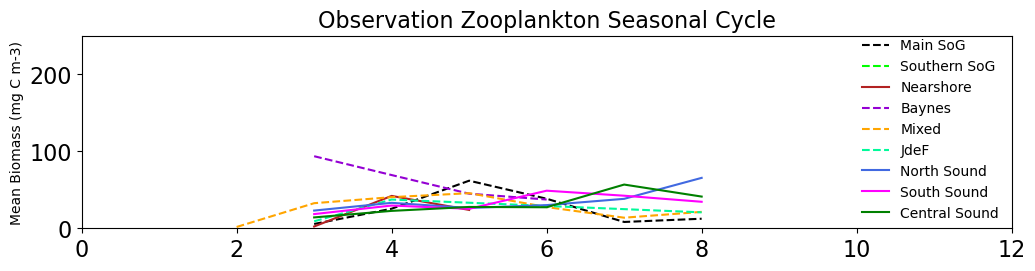

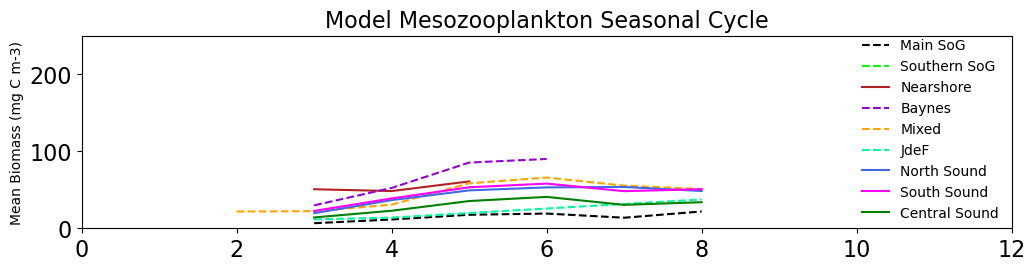

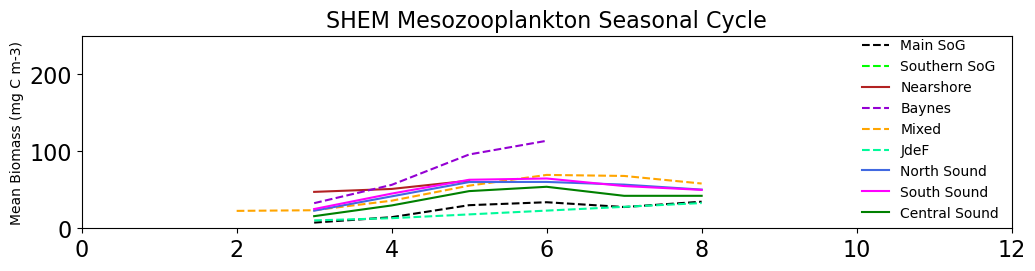

In [198]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanMainSoG['L10Total']),'--',color='k',label='Main SoG')
ax.plot(logt_inv(monthlymeanSouthernSoG['L10Total']),'--',color='lime',label='Southern SoG')
ax.plot(logt_inv(monthlymeanNearshore['L10Total']),'-',color='firebrick',label='Nearshore')
ax.plot(logt_inv(monthlymeanBaynes['L10Total']),'--',color='darkviolet',label='Baynes')
ax.plot(logt_inv(monthlymeanMixed['L10Total']),'--',color='orange',label='Mixed')
ax.plot(logt_inv(monthlymeanJdeF['L10Total']),'--',color='mediumspringgreen',label='JdeF')
ax.plot(logt_inv(monthlymeanNorthSound['L10Total']),'-',color='royalblue',label='North Sound')
ax.plot(logt_inv(monthlymeanSouthSound['L10Total']),'-',color='fuchsia',label='South Sound')
ax.plot(logt_inv(monthlymeanCentralSound['L10Total']),'-',color='green',label='Central Sound')
ax.set_ylim(0,250)
ax.set_xlim(0,12)
ax.set_title('Observation Zooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10,frameon=False,bbox_to_anchor=(1., 1.05))

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanMainSoG['L10mod_mesozooplankton']),'--',color='k',label='Main SoG')
ax.plot(logt_inv(monthlymeanSouthernSoG['L10mod_mesozooplankton']),'--',color='lime',label='Southern SoG')
ax.plot(logt_inv(monthlymeanNearshore['L10mod_mesozooplankton']),'-',color='firebrick',label='Nearshore')
ax.plot(logt_inv(monthlymeanBaynes['L10mod_mesozooplankton']),'--',color='darkviolet',label='Baynes')
ax.plot(logt_inv(monthlymeanMixed['L10mod_mesozooplankton']),'--',color='orange',label='Mixed')
ax.plot(logt_inv(monthlymeanJdeF['L10mod_mesozooplankton']),'--',color='mediumspringgreen',label='JdeF')
ax.plot(logt_inv(monthlymeanNorthSound['L10mod_mesozooplankton']),'-',color='royalblue',label='North Sound')
ax.plot(logt_inv(monthlymeanSouthSound['L10mod_mesozooplankton']),'-',color='fuchsia',label='South Sound')
ax.plot(logt_inv(monthlymeanCentralSound['L10mod_mesozooplankton']),'-',color='green',label='Central Sound')
ax.set_ylim(0,250)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10,frameon=False,bbox_to_anchor=(1., 1.05))

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanMainSoG['L10SHEM_mesozooplankton']),'--',color='k',label='Main SoG')
ax.plot(logt_inv(monthlymeanSouthernSoG['L10SHEM_mesozooplankton']),'--',color='lime',label='Southern SoG')
ax.plot(logt_inv(monthlymeanNearshore['L10SHEM_mesozooplankton']),'-',color='firebrick',label='Nearshore')
ax.plot(logt_inv(monthlymeanBaynes['L10SHEM_mesozooplankton']),'--',color='darkviolet',label='Baynes')
ax.plot(logt_inv(monthlymeanMixed['L10SHEM_mesozooplankton']),'--',color='orange',label='Mixed')
ax.plot(logt_inv(monthlymeanJdeF['L10SHEM_mesozooplankton']),'--',color='mediumspringgreen',label='JdeF')
ax.plot(logt_inv(monthlymeanNorthSound['L10SHEM_mesozooplankton']),'-',color='royalblue',label='North Sound')
ax.plot(logt_inv(monthlymeanSouthSound['L10SHEM_mesozooplankton']),'-',color='fuchsia',label='South Sound')
ax.plot(logt_inv(monthlymeanCentralSound['L10SHEM_mesozooplankton']),'-',color='green',label='Central Sound')
ax.set_ylim(0,250)
ax.set_xlim(0,12)
ax.set_title('SHEM Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10,frameon=False,bbox_to_anchor=(1., 1.05))

# fig,ax=plt.subplots(1,1,figsize=(12,2.5))
# ax.plot(logt_inv(monthlymeanMainSoG['L10mod_microzooplankton']),'--',color='k',label='Main SoG')
# ax.plot(logt_inv(monthlymeanSouthernSoG['L10mod_microzooplankton']),'--',color='lime',label='Southern SoG')
# ax.plot(logt_inv(monthlymeanNearshore['L10mod_microzooplankton']),'-',color='firebrick',label='Nearshore')
# ax.plot(logt_inv(monthlymeanBaynes['L10mod_microzooplankton']),'--',color='darkviolet',label='Baynes')
# ax.plot(logt_inv(monthlymeanMixed['L10mod_microzooplankton']),'--',color='orange',label='Mixed')
# ax.plot(logt_inv(monthlymeanJdeF['L10mod_microzooplankton']),'--',color='mediumspringgreen',label='JdeF')
# ax.plot(logt_inv(monthlymeanNorthSound['L10mod_microzooplankton']),'-',color='royalblue',label='North Sound')
# ax.plot(logt_inv(monthlymeanSouthSound['L10mod_microzooplankton']),'-',color='fuchsia',label='South Sound')
# ax.plot(logt_inv(monthlymeanCentralSound['L10mod_microzooplankton']),'-',color='green',label='Central Sound')
# ax.set_ylim(0,75)
# ax.set_xlim(0,12)
# ax.set_title('Model Microzooplankton Seasonal Cycle')
# ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
# ax.legend(fontsize=10,frameon=False,bbox_to_anchor=(1., 1.05))


# 

In [199]:
datreg=dict()
for iregion in data.broadregions.unique():
    datreg[iregion] = data.loc[data.broadregions==iregion]  

In [200]:
def _flatten_nested_dict(tdic0):
    # used by displayStats function
    # tdic argument is nested dictionary of consistent structure
    def _flatten_nested_dict_inner(tdic,ilist,data):
        # necessary because mutable defaults instantiated when function is defined;
        # need different entry point at start
        for el in tdic.keys():
            if isinstance(tdic[el],dict):
                data=_flatten_nested_dict_inner(tdic[el],ilist+list((el,)),data)
            else:
                data.append(ilist+list((el,tdic[el])))
        return data
    ilist0=list()
    data0=list()
    data0=_flatten_nested_dict_inner(tdic0,ilist0,data0)
    return data0

def displayStats(statdict,level='Subset',suborder=None):
    # stats dict starting from variable level
    cols={'Subset':('Subset','Metric',''),
          'Variable':('Variable','Subset','Metric',''),
          'Year':('Year','Variable','Subset','Metric','')}
    ind={'Subset':['Order','Subset','Metric'],
         'Variable':['Variable','Order','Subset','Metric'],
         'Year':['Variable','Subset','Metric']}
    pcols={'Subset':['Metric'],
           'Variable':['Metric'],
           'Year':['Year','Metric']}
    allrows=_flatten_nested_dict(statdict)
    tdf=pd.DataFrame(allrows,columns=cols[level])
    if suborder is not None:
        subD={suborder[ii]: ii for ii in range(0,len(suborder))}
        tdf['Order']=[subD[tdf['Subset'][ii]] for ii in range(0,len(tdf['Subset']))]
    tdf.set_index(ind[level],inplace=True)
    tbl=pd.pivot_table(tdf,index=ind[level][:-1],columns=pcols[level]).rename_axis(index={'Order':None},columns={'Metric':None}).style.format({
        'N': '{:d}',
        'Bias':'{:.3f}',
        'WSS':'{:.3f}',
        'RMSE':'{:.3f}'})
    return tbl,tdf


In [201]:
### These groupings will be used to calculate statistics. The keys are labels and
### the values are corresponding dataframe views
statsubs=OrderedDict({'All':data,
                      'Winter':DJF,
                      'Spring':MAM,
                      'Summer':JJA,
                      'Autumn': SON,})
for iregion in data.broadregions.unique():
    statsubs[iregion]=datreg[iregion]
statsubs.keys()

odict_keys(['All', 'Winter', 'Spring', 'Summer', 'Autumn', 'Mixed', 'North Sound', 'South Sound', 'Main SoG', 'Baynes', 'Nearshore', 'JdeF', 'Central Sound', 'Southern SoG'])

In [202]:
def displayStatsFlex(statdict,cols,ind,pcols,suborder=None):
    # more flexible version of stats display
    # stats dict starting from variable level
    allrows=_flatten_nested_dict(statdict)
    tdf=pd.DataFrame(allrows,columns=cols)
    if suborder is not None:
        subD={suborder[ii]: ii for ii in range(0,len(suborder))}
        tdf['Order']=[subD[tdf['Subset'][ii]] for ii in range(0,len(tdf['Subset']))]
    tdf.set_index(ind,inplace=True)
    tbl=pd.pivot_table(tdf,index=ind[:-1],columns=pcols).rename_axis(index={'Order':None},columns={'Metric':None}).style.format({
        'N': '{:d}',
        'Bias':'{:.3f}',
        'WSS':'{:.3f}',
        'RMSE':'{:.3f}',
        'crmsd':'{:.3f}'})
    return tbl,tdf

In [203]:
# Defining variables needed for mesozooplankton evaluations
obsvar2='L10Total'
modvar2='L10mod_mesozooplankton'
year=2018 #how do I calculate for all years?

In [204]:
# Defining variables needed for mesozooplankton evaluations
obsvar2='L10Total'
modvar2='L10mod_mesozooplankton'
year=2018 #how do I calculate for all years?

In [205]:
statsDict={year:dict()}
statsDict[year]['MesoZ']=OrderedDict()
for isub in statsubs:
    print(isub)
    statsDict[year]['MesoZ'][isub]=dict()
    var=statsDict[year]['MesoZ'][isub]
    var['N'],mmean,omean,var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubs[isub].loc[:,[obsvar2]],
                                                                     statsubs[isub].loc[:,[modvar2]])
tbl,tdf=displayStats(statsDict[year]['MesoZ'],level='Subset',suborder=list(statsubs.keys()))
tbl

All
Winter
Spring
Summer
Autumn
Mixed
North Sound
South Sound
Main SoG
Baynes
Nearshore
JdeF
Central Sound
Southern SoG


In [206]:
# Defining variables needed for mesozooplankton evaluations
obsvar4='logt_invL10TotalDI'
modvar4='logt_invL10mod_mesozooplanktonDI'
year=2018 #how do I calculate for all years?

In [207]:
statsDict={year:dict()}
statsDict[year]['MesoZ']=OrderedDict()
for isub in statsubs:
    print(isub)
    statsDict[year]['MesoZ'][isub]=dict()
    var=statsDict[year]['MesoZ'][isub]
    var['N'],var['mmean'],var['omean'],var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubs[isub].loc[:,[obsvar4]],
                                                                     statsubs[isub].loc[:,[modvar4]])

tbl,tdf=et.displayStats(statsDict[year]['MesoZ'],level='Subset',suborder=list(statsubs.keys()))
#tbl.format({
#        'N': '{:d}',
#        'Bias':'{:.3f}',
#        'WSS':'{:.3f}',
#        'RMSE':'{:.3f}'})

tbl
#tbl.to_excel("SalishSeaMesozoopEvalStats_backtransformed.xlsx")

All
Winter
Spring
Summer
Autumn
Mixed
North Sound
South Sound
Main SoG
Baynes
Nearshore
JdeF
Central Sound
Southern SoG


In [208]:
# Defining variables needed for mesozooplankton evaluations
obsvar5='L10TotalDI'
modvar5='L10mod_mesozooplanktonDI'
year=2018 #how do I calculate for all years?

In [209]:

statsDict={year:dict()}
statsDict[year]['MesoZ']=OrderedDict()
for isub in statsubs:
    print(isub)
    statsDict[year]['MesoZ'][isub]=dict()
    var=statsDict[year]['MesoZ'][isub]
    var['N'],var['mmean'],var['omean'],var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubs[isub].loc[:,[obsvar5]],
                                                                     statsubs[isub].loc[:,[modvar5]])


tbl,tdf=et.displayStats(statsDict[year]['MesoZ'],level='Subset',suborder=list(statsubs.keys()))
tbl

#tbl.to_excel("SalishSeaMesozoopEvalStats.xlsx")


All
Winter
Spring
Summer
Autumn
Mixed
North Sound
South Sound
Main SoG
Baynes
Nearshore
JdeF
Central Sound
Southern SoG


In [210]:
# Defining variables needed for mesozooplankton evaluations
obsvar5='L10TotalDI'
modvar5='L10SHEM_mesozooplanktonDI'
year=2018 #how do I calculate for all years?

In [211]:
statsDict={year:dict()}
statsDict[year]['MesoZ']=OrderedDict()
for isub in statsubs:
    print(isub)
    statsDict[year]['MesoZ'][isub]=dict()
    var=statsDict[year]['MesoZ'][isub]
    var['N'],var['mmean'],var['omean'],var['Bias'],var['RMSE'],var['WSS']=et.stats(statsubs[isub].loc[:,[obsvar5]],
                                                                     statsubs[isub].loc[:,[modvar5]])


tbl,tdf=et.displayStats(statsDict[year]['MesoZ'],level='Subset',suborder=list(statsubs.keys()))
tbl

#tbl.to_excel("SalishSeaMesozoopEvalStats.xlsx")


All
Winter
Spring
Summer
Autumn
Mixed
North Sound
South Sound
Main SoG
Baynes
Nearshore
JdeF
Central Sound
Southern SoG


In [212]:
data['L10mod_mesozooplanktonDI']

1497    0.036805
1498    0.588633
1499    0.360269
1500    0.388469
1501    0.314071
          ...   
1701    0.744249
1702    0.815684
1703    0.590512
1704    0.820073
1705    0.836672
Name: L10mod_mesozooplanktonDI, Length: 209, dtype: float64

In [213]:
from sklearn.metrics import r2_score

x=data['L10TotalDI']
y=data['L10mod_mesozooplanktonDI']

x=x[~np.isnan(x)]
y=y[~np.isnan(y)]
r_squared=r2_score(x,y)

print(r_squared)

0.30627560157401557


In [214]:
from sklearn.metrics import r2_score

x=data['L10TotalDI']
y=data['L10SHEM_mesozooplanktonDI']

x=x[~np.isnan(y)]
y=y[~np.isnan(y)]
r_squared=r2_score(x,y)

print(r_squared)

0.32013201660859525


In [215]:
from skill_metrics import utils

In [216]:
def bias(predicted,reference):
    '''
    Calculate the bias (B) between two variables PREDICTED and
    REFERENCE (E'). The latter is calculated using the formula:

    B = mean(p) - mean(r)

    where p is the predicted values, and r is the reference values.
    Note that p & r must have the same number of values.

    Input:
    PREDICTED : predicted field
    REFERENCE : reference field

    Output:
    B : bias between predicted and reference

    Author: Peter A. Rochford
        Symplectic, LLC
        www.thesymplectic.com
        prochford@thesymplectic.com

    Created on Dec 9, 2016
    '''

    utils.check_arrays(predicted, reference)

    # Calculate means
    b = np.mean(predicted) - np.mean(reference)

    return b

In [217]:
def rmsd(predicted,reference):
    '''
    Calculate root-mean-square deviation (RMSD) between two variables

    Calculates the root-mean-square deviation between two variables
    PREDICTED and REFERENCE. The RMSD is calculated using the
    formula:

    RMSD^2 = sum_(n=1)^N [(p_n - r_n)^2]/N

    where p is the predicted values, r is the reference values, and
    N is the total number of values in p & r. Note that p & r must
    have the same number of values.

    Input:
    PREDICTED : predicted values
    REFERENCE : reference values

    Output:
    R : root-mean-square deviation (RMSD)

    Author: Peter A. Rochford
        Symplectic, LLC
        www.thesymplectic.com
        prochford@thesymplectic.com

    Created on Dec 9, 2016
    '''

    utils.check_arrays(predicted, reference)

    # Calculate the RMSE
    r = np.sqrt(np.sum(np.square(predicted - reference))/len(predicted))

    return r

In [218]:
def centered_rms_dev(predicted,reference):
    '''
    Calculates the centered root-mean-square (RMS) difference between
    two variables PREDICTED and REFERENCE (E'). The latter is calculated
    using the formula:

    (E')^2 = sum_(n=1)^N [(p_n - mean(p))(r_n - mean(r))]^2/N

    where p is the predicted values, r is the reference values, and
    N is the total number of values in p & r. Note that p & r must
    have the same number of values.

    Input:
    PREDICTED : predicted field
    REFERENCE : reference field

    Output:
    CRMSDIFF : centered root-mean-square (RMS) difference (E')^2

    Author: Peter A. Rochford
        Symplectic, LLC
        www.thesymplectic.com
        prochford@thesymplectic.com

    Created on Nov 24, 2016
    '''

    utils.check_arrays(predicted, reference)

    # Calculate means
    pmean = np.mean(predicted)
    rmean = np.mean(reference)

    # Calculate (E')^2
    crmsd = np.square((predicted - pmean) - (reference - rmean))
    crmsd = np.sum(crmsd)/predicted.size
    crmsd = np.sqrt(crmsd)

    return crmsd

In [219]:
### Calculate Centered RMSE for each region and each season
### Regions: MainSoG, SouthernSoG, Nearshore, Baynes, Mixed, JdeF, NorthSound, CentralSound, SouthSound
### Seasons: DJF (winter),MAM (spring),JJA (summer),SON(autumn)

In [220]:
centered_rms_dev(MainSoG['L10SHEM_mesozooplanktonDI'],MainSoG['L10TotalDI'])

np.float64(0.3686322643143523)

In [221]:
centered_rms_dev(MainSoG['L10mod_mesozooplanktonDI'],MainSoG['L10TotalDI'])

np.float64(0.38469673155677)

In [222]:
rmsd(MainSoG['logt_invL10SHEM_mesozooplanktonDI'],MainSoG['logt_invL10TotalDI'])

np.float64(22.60410343050868)

In [223]:
rmsd(MainSoG['logt_invL10mod_mesozooplanktonDI'],MainSoG['logt_invL10TotalDI'])

np.float64(23.702008865127883)

In [224]:
bias(MainSoG['logt_invL10SHEM_mesozooplanktonDI'],MainSoG['logt_invL10TotalDI'])

np.float64(-6.513128182111244)

In [225]:
bias(MainSoG['logt_invL10mod_mesozooplanktonDI'],MainSoG['logt_invL10TotalDI'])

np.float64(-8.91060391796001)